<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/%D0%A2%D0%B5%D0%BC%D0%B0_2_Boosting_Tree_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**AdaBoost (Adaptive Boosting)**  

**Краткое описание:**  
Метод Adaptive Boosting (AdaBoost) представляет собой процесс последовательного добавления слабых базовых моделей к существующему ансамблю, с адаптивной корректировкой весов для каждой из базовых моделей, чтобы минимизировать ошибку.

### Что такое пошаговое аддитивное моделирование (Forward Stagewise Additive Modeling)?  
Рассмотрим базовую модель $b(x; r_m)$, управляемую параметром $r_m$.  
Параметр $\beta_m$ определяет вклад каждой слабой базовой модели в итоговый ансамбль.  

Итоговая модель $f(x)$, построенная на основе $M$ слабых моделей, описывается следующим образом:  
$$
f(x) = \sum_{m=1}^M \beta_m \cdot b(x; r_m)
$$  

Для получения классификатора используется функция знака $\text{sign}(x)$, преобразующая значения в классы:  
$$
G(x) = \text{sign}(f(x)) = \text{sign}\left(\sum_{m=1}^M \beta_m \cdot b(x; r_m)\right)
$$  

### Глобальная оптимизация для набора данных $D$  
Для набора данных $D$, содержащего $N$ наблюдений, минимизация функции потерь на всем наборе определяется следующим образом:  
$$
\min \sum_{i=1}^N \text{Loss}\left(y_i, \sum_{m=1}^M \beta_m \cdot b(x_i; r_m)\right)
$$  
На каждом шаге цель алгоритма — оптимально подобрать параметры $\beta_m$ и $r_m$ для текущей базовой модели так, чтобы приблизить решение к глобальному оптимуму:  
$$
\min \sum_{i=1}^N \text{Loss}\left(y_i, f_{m-1}(x_i) + \beta_m \cdot b(x_i; r_m)\right)
$$  

### Алгоритм пошагового аддитивного моделирования  
#### Входные данные:  
- Набор данных $D = \{(x_1, y_1), (x_2, y_2), \dots, (x_N, y_N)\}$  
- Функция потерь $\text{Loss}(y, f(x))$  
- Набор базовых моделей $\{b(x; r_m)\}$  

#### Выходные данные:  
- Итоговая модель $f(x)$.  

#### Шаги алгоритма:  
1. Инициализация: начальная модель $f_0(x) = 0$.  
2. Для каждого $m = 1, 2, \dots, M$:  
   - Минимизировать функцию потерь:  
$$
     (\beta_m, r_m) = \arg \min_{\beta, r} \sum_{i=1}^N \text{Loss}\left(y_i, f_{m-1}(x_i) + \beta \cdot b(x_i; r)\right)
$$  
   - Обновить модель:  
$$
     f_m(x) = f_{m-1}(x) + \beta_m \cdot b(x; r_m)
$$  
3. Итоговая модель задается следующим образом:  
$$
   f(x) = \sum_{m=1}^M \beta_m \cdot b(x; r_m)
$$  



### b. Что такое экспоненциальная функция потерь и почему она используется в алгоритме AdaBoost

Предположим, что $y$ принадлежит промежутку $(-1, 1)$, тогда экспоненциальная функция потерь имеет вид:

$$
\text{Loss}(y, f(x)) = \mathbb{E}(e^{-f(x)} \mid x) = P(y = 1 \mid x) e^{-f(x)} + P(y = -1 \mid x) e^{f(x)}
$$

Если мы возьмем производную от этой функции потерь по $f(x)$ и приравняем её к нулю, то получим, что при минимизации экспоненциальной функции потерь на самом деле происходит подгонка к логистической регрессии для вероятности $P(y = 1 \mid x)$:

$$
\frac{d}{df(x)} \mathbb{E}(e^{-f(x)}) = [-P(y = 1 \mid x) e^{-f(x)} + P(y = -1 \mid x) e^{f(x)}] = 0
$$

Решив это уравнение, мы получим:

$$
f(x) = \frac{1}{2} \log \frac{P(y = 1 \mid x)}{P(y = -1 \mid x)}
$$

Таким образом, оптимальное решение для $f(x)$ соответствует оптимальной вероятности по Байесу:

$$
\text{sign}(f(x)) = \begin{cases}
1, & \text{если} \, P(y = 1 \mid x) > P(y = -1 \mid x) \\
-1, & \text{если} \, P(y = 1 \mid x) < P(y = -1 \mid x)
\end{cases}
$$

Где:
- $\text{sign}(x) = 1$ при $x > 0$
- $\text{sign}(x) = -1$ при $x < 0$

Экспоненциальная функция потерь в AdaBoost помогает эффективно повышать вес правильно классифицированных объектов, способствуя тому, чтобы модель фокусировалась на сложных примерах, постепенно уменьшая ошибку на тренировочных данных.

### c. Математика за AdaBoost — как вычислить оптимальные параметры

Предположим, что после $m-1$ итераций мы вычислили функцию классификации $f_{m-1}(x)$, которая имеет вид:

$$
f_{m-1}(x) = f_{m-2}(x) + \beta_{m-1} b(x; r_{m-1}) = \sum_{i=1}^{m-1} \beta_i b(x_i)
$$

Теперь мы находимся на $m$-й итерации и хотим найти оптимальные параметры $\beta_m$ и $b_m(x; r_m)$ (обозначим $b_m(x)$) для минимизации экспоненциальной функции потерь.

Важно: выход $b_m(x)$ принадлежит промежутку $(-1, 1)$, а не вероятности. Целью является минимизация следующего выражения:

$$
\sum_{i=1}^N \arg \min_{\beta, b(x)} \text{Loss}(y_i, f_{m-1}(x) + \beta b(x))
$$

Где:

$$
\text{Loss}(y_i, f_{m-1}(x) + \beta b(x)) = \exp(-y_i f_{m-1}(x_i)) \cdot \exp(-y_i \beta b(x_i))
$$

Оптимизация осуществляется по $\beta$ и $b(x)$. Мы пытаемся минимизировать экспоненциальную потерю, вычисляя оптимальные веса для каждого примера:

$$
\min_{\beta, b(x)} \sum_{i=1}^N W_{mi} \exp(-y_i f_{m-1}(x_i)) \cdot \exp(-y_i \beta b(x_i))
$$

где $W_{mi} = \exp(-y_i f_{m-1}(x_i))$ — веса для каждого примера.

#### 1. Вычисление оптимального $b_m(x)$

Для нахождения оптимального $b_m(x)$ мы минимизируем следующее выражение:

$$
\arg \min_{b(x)} \sum_{i=1}^N W_{mi} \exp(-y_i \beta b(x_i))
$$

Решение для $b(x)$ даст нам значение, которое минимизирует экспоненциальную потерю для текущей итерации.

#### 2. Вычисление оптимального $\beta_m$

Затем для нахождения оптимального $\beta_m$, мы решаем:

$$
\arg \min_{\beta} \sum_{i=1}^N W_{mi} \exp(-y_i \beta b(x_i))
$$

Решение этого уравнения позволяет найти весовой коэффициент, который наилучшим образом сочетает информацию от предыдущих итераций с новыми классификаторами.

#### 3. Обновление весов $W_{m+1, i}$

После вычисления оптимальных значений $\beta_m$ и $b_m(x)$, обновляем веса для следующей итерации. Вес $W_{m+1, i}$ вычисляется как:

$$
W_{m+1, i} = \exp(-y_i f_m(x_i)) = \exp(-y_i [f_{m-1}(x_i) + \beta_m b_m(x_i)])
$$

Нормализуем веса, чтобы их сумма равнялась 1, что соответствует вероятности (аналогично функции softmax):

$$
W_{m+1, i} = \frac{W_{m+1, i}}{Z_m}
$$

где $Z_m$ — нормализующий фактор, обеспечивающий, что сумма всех весов равна 1.

Этот процесс повторяется для каждой итерации AdaBoost, с каждым разом улучшая классификацию и минимизируя ошибку.



### d. Актуальный рекуррентный алгоритм для AdaBoost с использованием деревьев

**Входные данные модели:**

Набор данных $D = \{(x_1, y_1), ..., (x_N, y_N)\}$, где $y_i \in \{-1, 1\}$.

**Выходные данные модели:**

Финальный классификатор $G(x)$.

**Шаги алгоритма:**

1. **Инициализация веса $T_1$:**

$$
   T_1 = (W_{11}, W_{12}, ..., W_{1N}), \quad W_{hi} \in \{1, 2, 3, 4, ..., N\}
$$

2. **Для $m = 1, 2, 3, ..., M$ (конечный классификатор состоит из $M$ слабых обучающих моделей):**

   - Используем набор данных $D$ с весами $T_m$ для обучения слабого классификатора $b_m(x)$, где $b_m(x) \in \{-1, 1\}$.

$$
     b_m = \arg \min \sum_{i=1}^{N} W_{mi} \cdot I(y_i \neq b_m(x_i))
$$
     Здесь $I$ — индикаторная функция, которая принимает значение 1, если $y_i \neq b_m(x_i)$, и 0 в противном случае.

   - Рассчитываем ошибку $e_m$ для $b_m(x)$ на наборе данных $D$:

$$
     e_m = \frac{\sum_{i=1}^{N} W_{mi} \cdot I(y_i \neq b_m(x_i))}{\sum_{i=1}^{N} W_{mi}}
$$

     Так как $\sum_{i=1}^{N} W_{mi} = 1$, получаем:

$$
     e_m = \sum_{i=1}^{N} W_{mi} \cdot I(y_i \neq b_m(x_i))
$$

   - Рассчитываем параметр $\beta_m$ для слабого классификатора $b_m(x)$:

$$
     \beta_m = \frac{1}{2} \log\left(\frac{1 - e_m}{e_m}\right)
$$

   - Обновляем веса $W_{m+1}$ для следующего слабого классификатора:

$$
     W_{m+1,i} = W_{mi} \cdot \exp(-\beta_m y_i b_m(x_i)), \quad Z_m = \sum_{i=1}^{N} W_{mi} \cdot \exp(-\beta_m y_i b_m(x_i))
$$

3. **Построение конечного классификатора:**

   Финальный классификатор $G(x)$ вычисляется как:

$$
   G(x) = \text{sign}\left(\sum_{m=1}^{M} \beta_m b_m(x)\right)
$$

   Где $\text{sign}$ — это функция знака, принимающая значение 1, если выражение положительно, и -1, если отрицательно.

### e. Подробное рассмотрение процесса обновления весов в AdaBoost

Помним, что:

$$
W_{m+1,i} = W_{mi} \cdot \exp(-\beta_m y_i b_m(x_i)), \quad Z_m = \sum_{i=1}^{N} W_{mi} \cdot \exp(-\beta_m y_i b_m(x_i))
$$

Таким образом, если $\beta_m > 0$, то происходит следующее:

- Если классификация выполнена правильно, то вес для соответствующего примера уменьшается, так как $\exp(-\beta_m)$ уменьшает значение веса.
- Если классификация выполнена неправильно, то вес для этого примера увеличивается, так как $\exp(\beta_m)$ увеличивает значение веса.

Это означает, что если классификатор правильно классифицирует пример, его вес уменьшается, что уменьшает его влияние на последующие классификации. Напротив, если классификатор ошибается, то вес примера увеличивается, что заставляет модель больше фокусироваться на этом примере в следующих итерациях.

### Применение в библиотеке Scikit-learn

**AdaBoostClassifier:**

```python
class sklearn.ensemble.AdaBoostClassifier(
    base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None
)
```

- **base_estimator**: объект (по умолчанию None) — это базовый классификатор, на основе которого строится ансамбль. По умолчанию используется классификатор DecisionTreeClassifier с глубиной максимума 1. Вы можете также использовать другие модели машинного обучения, такие как SVC.

- **n_estimators**: целое число (по умолчанию 50) — максимальное количество классификаторов, при котором обучение будет завершено. Это соответствует $M$ в формуле.

- **learning_rate**: вещественное число (по умолчанию 1.0) — коэффициент обучения, который уменьшает вклад каждого классификатора. Например, если предсказание на предыдущем шаге было $f_{m-1} = 1$, коэффициент обучения $\text{learning_rate} = 0.1$, а коррекция для следующего дерева $= 0.5$, то обновленное предсказание будет равно:

  $$
  f_m = 1 + 0.1 \cdot 0.5 = 1.05
  $$

  Уменьшение коэффициента обучения замедляет процесс обучения, но может привести к лучшему качеству модели.

- **algorithm**: строка, значения ‘SAMME’ или ‘SAMME.R’ (по умолчанию ‘SAMME.R’) — алгоритм, который будет использован для бустинга. Если выбран ‘SAMME.R’, то применяется реальный алгоритм бустинга. Базовый классификатор должен поддерживать вычисление вероятностей классов. Если выбран ‘SAMME’, используется дискретный алгоритм бустинга. Алгоритм ‘SAMME.R’ обычно сходится быстрее и достигает меньшей ошибки на тесте при меньшем количестве итераций бустинга.


## GBM (Gradient Boosting Machine)

**Однострочное описание**: Постепенное добавление слабых базовых моделей для аппроксимации отрицательного градиента с целью уменьшения общей ошибки.

### a. Различия между AdaBoost и GBM
AdaBoost использует экспоненциальную функцию потерь, при этом экспоненциальная потеря растет экспоненциально для отрицательных значений, что делает метод более чувствительным к выбросам. В отличие от этого, GBM позволяет использовать более устойчивые функции потерь, при условии, что они являются непрерывно дифференцируемыми.

| Модели | Методы корректировки предыдущих ошибок |
|--------|----------------------------------------|
| **AdaBoost** | Добавление весов для неправильно классифицированных примеров и уменьшение весов для правильно классифицированных примеров. |
| **GBM** | Использование отрицательного градиента как индикатора ошибок, сделанных предыдущими базовыми моделями, и обучение следующей базовой модели для аппроксимации отрицательного градиента предыдущих моделей. |

### b. Отрицательный градиент в GBM

В AdaBoost мы упоминаем метод Forward Stagewise Additive Modeling. Предположим, что мы находимся на m-ой итерации:

$$
f_m(x) = f_{m-1} + B_m b_m(x)
$$

Мы хотим уменьшить ошибку, как в AdaBoost:

$$
\min \sum_{i=1}^{N} \text{Loss}(y_i, f_m(x)) \quad \text{или} \quad \min \sum_{i=1}^{N} \text{Loss}(y_i, f_{m-1}(x) + B_m \cdot b_m(x))
$$

Однако здесь задача отличается от случая в AdaBoost. В AdaBoost мы точно знаем функцию потерь (экспоненциальную функцию), поэтому можем найти оптимальное значение $b_m(x)$. В GBM же мы хотим работать с любой функцией потерь, которая является дифференцируемой. Для этого мы применяем идею, аналогичную методу градиентного спуска, чтобы найти оптимальное значение $b_m(x)$ с помощью отрицательного градиента:

$$
\min \sum_{i=1}^{N} \text{Loss}(y_i, f_{m-1}(x) + \alpha_m \cdot b_m(x)) \quad \Rightarrow \quad b_m(x) = \text{const} \cdot \nabla \text{Loss}(y_i, f_{m-1}(x))
$$

Здесь $\alpha_m$ — параметр, похожий на скорость обучения, но принимающий отрицательные значения.

### c. Алгоритм GBM

**Входные данные модели**: Набор данных $D = \{(x_1, y_1), \dots, (x_N, y_N)\}, y_i \in \{-1, 1\}$

**Выходные данные модели**: Финальный классификатор/регрессор $f_m(x)$

**Шаги**:

1. **Инициализация**:
$$
   f_0(x) = \arg \min \sum_{i=1}^{N} \text{Loss}(y_i, 7)
$$

2. Для $m = 1, 2, 3, \dots, M$:
   - Вычисление отрицательного градиента:
$$
     \nabla \text{Loss}(y_i, f_{m-1}(x)) \quad \text{для} \quad i = 1, 2, 3, \dots, N
$$
   - Обучение новой модели (например, дерева) для минимизации квадратных потерь:
$$
     b_m(x) = \arg \min \sum_{i=1}^{N} \left( y_i - b(x) \right)^2
$$
   - Использование линейного поиска для нахождения оптимального шага (аналогично концепции скорости обучения в SGD):
$$
     \alpha_m = \arg \min \sum_{i=1}^{N} \text{Loss}(y_i, f_{m-1}(x_i) + \alpha_m b_m(x_i))
$$
   - Обновление функции $f_m(x)$:
$$
     f_m(x) = f_{m-1}(x) + \alpha_m \cdot b_m(x)
$$

3. Для $m = 1, 2, 3, \dots, M$:
$$
   f_m(x) = f_0(x) + \sum_{m=1}^M \alpha_m \cdot b_m(x)
$$


### d. Алгоритм регрессии на основе дерева решений GBM (Gradient Boosting Machine)
**Вход модели:** Данные D: $D = \{(x_1, y_1), \dots, (x_N, y_N)\}, y_i \in \mathbb{R}$  
**Выход модели:** Финальный регрессор: $f_M(x)$  
**Функция потерь:** Квадратичная ошибка (Square Loss)  
**Шаги алгоритма:**

1. **Инициализация:**
   Начальное значение $f_0(x)$ выбирается как решение задачи минимизации функции потерь:
$$
   f_0(x) = \arg\min \sum_{i=1}^N (y_i - f_0(x_i))^2
$$

2. **Для $m = 1, 2, 3, \dots, M$:**
   - **Вычисление отрицательного градиента** для функции потерь:
$$
     g_m(x) = -\frac{\partial}{\partial f_{m-1}(x)} \text{Loss}(y_i, f_{m-1}(x_i)) = 2(y_i - f_{m-1}(x_i))
$$
   - **Обучение нового дерева решений (CART)** для минимизации квадратичной ошибки:
     Построение дерева с разделением области значений на $J$ частей $R_{j,m}$ для каждого шага $m$.
$$
     b_m(x) = \arg\min_{b(x)} \sum_{i=1}^N (y_i - b(x_i))^2
$$
   - Вместо поиска оптимального параметра $\theta$ для всего дерева, оптимальные параметры $\theta_{j,m}$ находятся для каждой зоны дерева отдельно:
$$
     \theta_{j,m} = \arg\min \sum_{i=1}^N \left( y_i - (f_{m-1}(x_i) + \theta_{j,m} I(x_i \in R_{j,m})) \right)^2
$$
   - **Обновление функции предсказания**:
$$
     f_m(x) = f_{m-1}(x) + \sum_{j=1}^J \theta_{j,m} I(x \in R_{j,m})
$$

3. **Вывод финальной модели:**
$$
   f(x) = f_0(x) + \sum_{m=1}^M \sum_{j=1}^J \theta_{j,m} I(x \in R_{j,m})
$$

### e. Алгоритм классификации на основе дерева решений GBM
**Вход модели:** Данные D: $D = \{(x_1, y_1), \dots, (x_N, y_N)\}, y_i \in \{-1, 1\}$  
**Выход модели:** Финальный классификатор: $f_M(x)$  
**Функция потерь:** Девиантность (Deviance Loss)  
**Шаги алгоритма:**

1. **Инициализация:**
   - **Функция потерь (девиантность)** для каждого элемента:
$$
     p(y_i = 1 | x_i) = \frac{1}{1 + \exp(-f_m(x_i))}
$$
   - Начальные значения $f_0(x)$ выбираются так, чтобы минимизировать функцию потерь:
$$
     f_0(x) = \arg\min \sum_{i=1}^N \text{Loss}(p(y_i | x_i), y_i)
$$
   - Для нахождения оптимального $f_0(x)$ решается уравнение:
$$
     \sum_{i=1}^N \left( -\left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right] \right) = 0
$$

2. **Для $m = 1, 2, 3, \dots, M$:**
   - Вычисление отрицательного градиента для девиантности:
$$
     g_m(x_i) = \frac{d}{df_{m-1}(x_i)} \left[ y_i \log(p_{m-1}(x_i)) + (1 - y_i) \log(1 - p_{m-1}(x_i)) \right]
$$
   - **Обучение нового дерева решений (CART)** для минимизации девиантности:
$$
     b_m(x) = \arg\min \sum_{i=1}^N (y_i - b(x_i))^2
$$
   - Вместо поиска параметра $\theta$ для всего дерева, параметры $\theta_{j,m}$ оптимизируются для каждой зоны дерева:
$$
     \theta_{j,m} = \arg\min \sum_{i=1}^N \left( y_i - (f_{m-1}(x_i) + \theta_{j,m} I(x_i \in R_{j,m})) \right)^2
$$
   - **Обновление функции предсказания**:
$$
     f_m(x) = f_{m-1}(x) + \sum_{j=1}^J \theta_{j,m} I(x \in R_{j,m})
$$

3. **Вывод финальной модели:**
$$
   f(x) = f_0(x) + \sum_{m=1}^M \sum_{j=1}^J \theta_{j,m} I(x \in R_{j,m})
$$

### Применение в Scikit-learn

**GradientBoostingRegressor:**
```python
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(
    loss='ls',                # Тип функции потерь (по умолчанию 'ls' - минимизация квадратичной ошибки)
    learning_rate=0.1,        # Коэффициент обучения
    n_estimators=100,         # Количество деревьев
    subsample=1.0,            # Фракция случайно выбранных обучающих данных для каждого базового дерева
    max_depth=3,              # Глубина деревьев
    random_state=None,        # Начальное состояние для воспроизводимости результатов
    alpha=0.9,                # Альфа-квантиль для Huber loss, если он выбран
    verbose=0,                # Отключение вывода
    warm_start=False,         # Разрешить добавление деревьев в обученную модель
)
```

Основные гиперпараметры для **GradientBoostingRegressor** описаны выше. Стоит отметить, что выбор гиперпараметров, таких как коэффициент обучения (`learning_rate`), количество деревьев (`n_estimators`), и выбор функции потерь (`loss`), сильно влияет на производительность модели.




## XGboost (Extreme Gradient Boosting)

**One Sentence Summary:**
The process involves continuously adding weak base learners to approximate a more complex function, incorporating both the negative gradient and the negative second derivative, to identify a more accurate direction for minimizing the loss function.

**a. Difference between GBM and XGBoost:**

The primary distinction between Gradient Boosting Machine (GBM) and XGBoost lies in the utilization of derivatives to optimize the model. While GBM relies solely on the first derivative of the loss function to determine the optimal direction for minimizing loss, XGBoost improves this by incorporating both the first and second derivatives. This dual approach in XGBoost generally leads to more precise and efficient learning, enabling it to achieve superior performance in many tasks.

**Comparison:**

| **GBM (GBDT)** | **XGBoost** |
|----------------|-------------|
| Uses only the first derivative to identify the best base learners at each stage. | Uses both the first and second derivatives to guide model optimization. |
| No regularization term in the loss function in the original implementation. | Introduces regularization within the loss function, preventing overfitting. |
| Uses Mean Squared Error (MSE) as the criterion for selecting the best base learners in regression tasks. | Employs an advanced scoring method that incorporates considerations for overfitting. |
| Does not support sparse datasets. | Natively supports sparse datasets, enhancing computational efficiency. |
| Relies on pre-pruning to control overfitting. | Implements post-pruning to prevent overfitting, with a more effective strategy for avoiding underfitting. |

**b. How to find the best direction to reduce loss in XGBoost:**

In the context of XGBoost, the objective of finding the optimal direction to reduce the loss function is informed by the principles of *Forward Stagewise Additive Modeling*. This modeling technique builds the prediction incrementally by adding base learners that minimize the residuals at each stage. The final model output, \( f_M(x) \), can be expressed as the cumulative sum of the sequentially added learners, where each learner is chosen by considering both the first and second derivatives of the loss function.

This two-derivative approach enables a more refined step towards minimizing the loss, as it not only accounts for the slope (gradient) of the function but also incorporates curvature (second derivative), which leads to better convergence and a more accurate model.

**Перевод на русский:**

**Однострочное резюме:**
Процесс включает в себя последовательное добавление слабых базовых ученых для аппроксимации более сложной функции, учитывая как первый, так и второй производные от функции потерь, чтобы найти более точное направление для минимизации потерь.

**a. Различия между GBM и XGBoost:**

Основное различие между Gradient Boosting Machine (GBM) и XGBoost заключается в использовании производных для оптимизации модели. В то время как GBM использует только первую производную функции потерь для нахождения оптимального направления минимизации потерь, XGBoost улучшает этот процесс, учитывая как первую, так и вторую производную. Этот подход в XGBoost обычно приводит к более точным и эффективным результатам, что позволяет достичь лучших результатов в различных задачах.

**Сравнение:**

| **GBM (GBDT)** | **XGBoost** |
|----------------|-------------|
| Использует только первую производную для нахождения лучших базовых ученых на каждом этапе. | Использует как первую, так и вторую производную для оптимизации модели. |
| В исходной версии не имеет регуляризационного члена в функции потерь. | Вводит регуляризацию в функцию потерь, предотвращая переобучение. |
| Использует среднеквадратичную ошибку (MSE) как критерий для выбора лучших базовых ученых в задачах регрессии. | Использует более сложный метод оценки, который учитывает переобучение. |
| Не поддерживает разреженные наборы данных. | Нативно поддерживает разреженные наборы данных, повышая вычислительную эффективность. |
| Использует предварительную обрезку для контроля за переобучением. | Использует пост-обрезку для предотвращения переобучения и более эффективно предотвращает недообучение. |

**b. Как найти лучшее направление для уменьшения потерь в XGBoost:**

В контексте XGBoost задача нахождения оптимального направления для уменьшения функции потерь основывается на принципах *Forward Stagewise Additive Modeling*. Эта методика построения модели заключается в поэтапном добавлении базовых ученых, которые минимизируют остаточные ошибки на каждом этапе. Конечный вывод модели $f_M(x)$ может быть выражен как сумма последовательно добавляемых ученых, где каждый ученый выбирается с учетом как первой, так и второй производной функции потерь.



### Как найти оптимальное направление для уменьшения потерь в XGBoost

Как мы упоминали в предыдущем разделе, используем метод **Forward Stagewise Additive Modeling**. Итоговое выходное значение $f_M(x)$ имеет вид:

$$
f_M(x) = f(x) + \sum_{m=1}^{M} \Delta f_m(x)
$$

Предположим, что мы находимся на шаге $m$, и используем $G_m(x)$ для упрощения:

$$
f_m(x) = f_{m-1}(x) + B_m \cdot b_m(x) = f_{m-1}(x) + G_m(x)
$$

Поскольку все предыдущие $m-1$ базовые модели фиксированы, наша функция потерь выглядит следующим образом:

$$
\text{Loss} = \sum_{i=1}^{N} \text{Loss}(y_i, f_{m-1}(x_i) + G_m(x_i))
$$

где $G_m(x)$ представляет собой регуляризационный термин, который зависит от числа листовых узлов $J$ в дереве решения (CART), и выходного значения $b_j$ на каждом листе:

$$
\text{Reg}(G_m(x)) = \sum_{j=1}^{J} \lambda b_j^2
$$

Используя разложение в ряд Тейлора для функции потерь вокруг $f_{m-1}(x)$, мы получаем следующее приближение:

$$
\text{Loss}(y_i, f_{m-1}(x_i) + G_m(x_i)) = \text{Loss}(y_i, f_{m-1}(x_i)) + \nabla G_m(x_i) + \frac{1}{2} G_m(x_i)^\top H_m G_m(x_i)
$$

где $\nabla G_m(x_i)$ — это градиент, а $H_m$ — матрица Гессе для функции потерь.

Рассматривая $G_m(x)$ как дерево решений, которое разбивает пространство на $J$ конечных узлов, каждый из которых имеет предсказанное значение $b_j$, мы записываем:

$$
G_m(x_i) = \sum_{j=1}^{J} b_j I(x_i \in R_j)
$$

где $I(x_i \in R_j)$ — индикаторная функция, которая равна 1, если $x_i$ находится в области $R_j$, и 0 в противном случае.

Функция потерь, включая регуляризацию, примет вид:

$$
\text{Loss}(y_i, f_{m-1}(x_i) + G_m(x_i)) = \sum_{j=1}^{J} \left( G_m(x_i) + \frac{1}{2} H_m G_m(x_i) \right) + \lambda \sum_{j=1}^{J} b_j^2
$$

Наша цель на текущем шаге — найти оптимальное направление для минимизации потерь, то есть оптимизировать структуру дерева $\{ R_j \}$, чтобы минимизировать эту функцию потерь:

$$
\{ R_j \} = \arg\min \left( \sum_{j=1}^{J} G_j b_j + \frac{1}{2} H_2 b_j^2 + \lambda \sum_{j=1}^{J} b_j^2 \right)
$$

где $G_j$ — это градиент, а $H_2$ — вторичная производная функции потерь относительно $b_j$.

Далее мы минимизируем эту функцию, находя оптимальные значения $b_j$ для каждого узла дерева. Решение для $b_j$ имеет вид:

$$
b_j = - \frac{G_j}{H_2 + \lambda}
$$

где $G_j = \sum_{i=1}^{N} \nabla_i$ и $H_2 = \sum_{i=1}^{N} H_{i,j}$.

Таким образом, минимизация функции потерь сводится к нахождению оптимальных значений для структуры дерева и коэффициентов $b_j$, что позволяет улучшить качество модели, минимизируя общие потери.







### c. Алгоритм XGBoost

В качестве примера рассматриваем регрессионное дерево.

**Входные данные модели:**  
Набор данных $D = \{(x_1, y_1), \dots, (x_N, y_N)\}, \, y_i \in \mathbb{R}$  

**Выход модели:**  
Окончательный регрессор: $f_M(x)$  

**Шаги работы алгоритма XGBoost:**

1. **Инициализация:**
   
   На первом шаге задаем начальную модель. В качестве начальной модели используется простая константа:
   $$
   f_0(x) = \arg\min \sum_{i=1}^N \text{Loss}(y_i, \hat{y}_i)
   $$
   где \(\hat{y}_i\) — предсказания модели, а \(\text{Loss}\) — функция потерь.

2. **Основной цикл (для \(m = 1, 2, 3, \dots, M\)):**

   - **Вычисление градиента:**
     На каждом шаге для каждого объекта \(x_i\) вычисляется градиент функции потерь по отношению к текущей модели:
     $$
     g_i = \frac{\partial}{\partial f_{m-1}(x_i)} \text{Loss}(y_i, f_{m-1}(x_i))
     $$

   - **Вычисление второй производной:**
     Для дальнейшей оптимизации модели рассчитывается вторая производная функции потерь:
     $$
     h_i = \frac{\partial^2}{\partial f_{m-1}(x_i)^2} \text{Loss}(y_i, f_{m-1}(x_i))
     $$

   - **Построение нового дерева решений:**  
     Строим новое дерево решений, минимизируя функцию потерь с учетом регуляризационного члена. Новое дерево $G_m(x)$ определяется как:
     $$
     G_m(x_i) = \arg\min \left[ \sum_{j=1}^J \left( \text{Loss}(y_i, f_{m-1}(x_i)) + \lambda \sum_i \left( G_m(x_i)^2 \right) \right) \right]
     $$
     где \(\lambda\) — параметр регуляризации.

   - **Обновление функции модели:**  
     После того как дерево найдено, обновляется текущая модель:
     $$
     f_m(x) = f_{m-1}(x) + G_m(x)
     $$
   
3. **Выход из модели:**  
   После завершения всех итераций основной цикл завершается, и выходной регрессор будет равен:
   $$
   f_M(x) = f_0(x) + \sum_{m=1}^M G_m(x)
   $$

### d. Подробности о поиске лучшего разбиения в каждом базовом ученике

Алгоритм XGBoost предлагает четыре метода для нахождения оптимального разбиения для каждого базового ученика (дерева решений). Рассмотрим один из них — **точный жадный алгоритм** (Exact Greedy Algorithm).

**Метод 1: Точный жадный алгоритм**

Для каждого разбиения в каждом базовом ученике вычисляется прирост функции потерь. Пусть $GL$ и $GR$ — это градиенты, рассчитанные для левой и правой части после разбиения, а $HL$ и $HR$ — это вторые производные в этих частях. Тогда прирост вычисляется как разница между функцией потерь до и после разбиения:

- **До разбиения:**
  $$
  \text{Loss}_{\text{before split}} = \sum_{i=1}^N \left( \text{Loss}(y_i, f(x_i)) \right)
  $$
  
- **После разбиения:**
  $$
  \text{Loss}_{\text{after split}} = \sum_{i=1}^N \left( \text{Loss}(y_i, f(x_i)) \right) + \text{регуляризация}
  $$

Прирост от разбиения $\text{gain}$ определяется как:
$$
\text{gain} = \text{Loss}_{\text{before split}} - \text{Loss}_{\text{after split}}
  $$

Задача алгоритма состоит в нахождении признака и точки разбиения, которые дают максимальный прирост.

**Псевдокод для точного жадного алгоритма поиска разбиения:**

**Входные данные:**  
$I$ — множество экземпляров текущего узла  
$d$ — размерность признаков

**Шаги алгоритма:**

1. Инициализируем переменную $\text{score} = 0$.
2. Для каждого признака $k = 1$ до $m$ (по всем $m$ признакам) сортируем экземпляры по значению этого признака.
3. Для каждого возможного разбиения $j$ в отсортированных экземплярах:
   - Вычисляем $GL$ и $HL$ для левой части.
   - Вычисляем $GR$ и $HR$ для правой части.
   - Вычисляем прирост функции потерь.
4. Выбираем разбиение с максимальным приростом.

**Выходные данные:**  
Оптимальное разбиение с максимальным приростом.



**Метод 2: Приближенный алгоритм с использованием взвешенного квантильного эскиза**

Приведенный выше точный жадный алгоритм работает слишком медленно, когда мы имеем большие объемы данных. Это происходит потому, что необходимо пройти по всем возможным признакам и точкам разбиения, а затем вычислить прирост для каждой комбинации. Пусть имеется $k$ признаков и $n$ примеров, тогда нам нужно вычислить около $k \times (n - 1)$ приростов. Таким образом, мы можем улучшить этот процесс, осуществляя разбиение по заранее заданным процентильным корзинам, вместо того чтобы использовать все возможные точки данных.

Для этого мы используем вторую производную как вес для создания процентильных корзин.

Пусть $D_k$ — это мультимножество, представляющее значения $k$-го признака и статистику второй производной для каждого обучающего примера:

$$
D_k = \{(X_{1k}, h_k), (X_{2k}, h_k), \dots, (X_{n k}, h_k)\}
$$

Затем мы определяем следующую функцию ранга $r_k$, основанную на взвешенной второй производной, для вычисления процентиля:

$$
T'_k(2) = \sum (D_h) \sum h(x, k) \in D
$$

После определения функции ранга необходимо ввести еще один параметр $\varepsilon$, чтобы задать размер наших корзин. Чем больше $\varepsilon$, тем больше будут корзины и процентиль, который мы используем. Например, если $\varepsilon = 0.25$, то способ разбиения будет очень похож на использование процентилей, взвешенных второй производной.

Кандидаты для точек разбиения: $\{ S_{k1}, S_{k2}, \dots, S_{kl} \}$

таким образом, что $r_k(S_{k_j} - S_{k_{j+1}}) < \varepsilon$, $S_{k1}$ минимален, $S_{k_l}$ максимален.

После вычисления этого шага, необходимо просто пройти через все предложенные точки разбиения и найти точку с максимальным приростом. Ниже приведен псевдокод этого алгоритма, как он описан в оригинальной статье.

**Алгоритм 2: Приближенный алгоритм для нахождения точек разбиения**

```python
для k = 1 до m:  # цикл по всем признакам, создаем корзины для каждого из них
  Предложить Sk = {S_{k1}, S_{k2}, ..., S_{kι}} по процентилям для признака k.
  Предложение может быть выполнено как для всего дерева (глобально), так и для каждого разбиения (локально).
конец
# глобально: определяем корзины до построения дерева, # локально: определяем корзины перед каждым разбиением.
для k = 1 до m:
  # цикл по всем признакам
  G_{k v} += ∑_{j ∈ {j | x_{jk} > S_{k,v-1}}} 9j
  # цикл по всем точкам разбиения
  H_{k v} += ∑_{j ∈ {j | x_{jk} ≥ S_{k,v-1}}} h_j
конец
Следуйте тем же шагам, что и в предыдущем разделе, чтобы найти максимальный прирост среди предложенных точек разбиения.
```

---

**Метод 3: Разбиение с учетом разреженности**

Большинство алгоритмов деревьев до XGBoost не могут работать с наборами данных, содержащими пропущенные значения. Поэтому необходимо тратить много времени на заполнение пропущенных значений перед подачей данных в модель машинного обучения. Однако XGBoost использует простую идею для поддержки разреженности: статистика собирается только по неполным данным при создании корзин и точек разбиения, а затем проверяется, на какую сторону дерева следует отнести образцы с пропущенными значениями, чтобы максимизировать прирост.

Ниже приведен псевдокод этого алгоритма, как он описан в оригинальной статье.

**Алгоритм 3: Разбиение с учетом разреженности**

**Входные данные:**
- $I$, набор примеров для текущего узла
- $I_k = \{i \in I | x_{ik} \neq \text{missing}\}$, неполные данные для признака $k$
- $d$, размерность признаков
- Применяется также к приближенной настройке — статистика собирается только по неполным данным.

```python
goin ← O score
Gigi, H – Die hi
для k = 1 до m:  # цикл по всем признакам
  // перечисление пропущенных значений, если они идут в правую сторону
  GL ← 0, HL ← 0  # если пропущенные значения идут вправо
  для j в отсортированном (Ik) по возрастанию xjk:
    GL ← GL + 9j, HL ← HL + hj
  H ← H, GRG ← GL, HR ← H
  G score ← max(score, HL + X + HR + A G2)
  
  // перечисление пропущенных значений, если они идут в левую сторону
  GR ← 0, HR ← 0  # если пропущенные значения идут влево
  для j в отсортированном (Ik) по убыванию xjk:
    GR ← GR + 9j, HR ← HR + hj
  GL ← GR, HL ← HR
  G score ← max(score, HL + X + HR + X)
конец

Выходные данные: точка разбиения и направление по умолчанию с максимальным приростом.



**e. Системный дизайн XGBoost**

XGBoost также обладает отличным системным дизайном: Column Block для параллельного обучения, Cache-aware доступ и блоки для обработки данных вне ядра (out-of-core).

До появления XGBoost параллельное обучение можно было реализовать только в Random Forest, поскольку деревья внутри Random Forest независимы. Однако в традиционном градиентном бустинге (GBM) каждое новое разбиение зависит от результатов предыдущих базовых моделей, поэтому мы не можем строить базовые модели параллельно.

XGBoost достиг параллельного обучения, храня данные в сжатом формате колонок (CSC), параллельно вычисляя градиенты и вторые производные для каждого признака, а также параллельно вычисляя лучшие точки разбиения. Например, если в нашем наборе данных есть 4 признака, и для поиска лучшей точки разбиения на одном признаке нам нужно 10 секунд, то традиционный метод должен проверять признаки по одному и затратить 40 секунд для нахождения лучших признаков и соответствующих точек разбиения. В XGBoost это занимает всего 10 секунд.

Здесь мы не будем подробно рассматривать остальные аспекты системного дизайна, так как они больше связаны с областью информатики.

**Применение XGBoost**

**XGBRegressor:**

```python
class xgboost.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, objective='reg:squarederror', booster='gbtree', tree_method='auto', n_jobs=1, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, missing=None, num_parallel_tree=1, importance_type='gain', **kwargs)
```

- **max_depth**: int, (по умолчанию=6)  
  Максимальная глубина базовых деревьев. Этот параметр используется для контроля переобучения и должен настраиваться с помощью кросс-валидации.

- **learning_rate**: float, (по умолчанию=0.1)  
  Шаг изменения для предотвращения переобучения, аналогичен AdaBoost и GBM.

- **n_estimators**: int, (по умолчанию=100)  
  Максимальное количество деревьев для построения. Это соответствует M в формуле.

- **objective**: строка, (по умолчанию='reg:squarederror')  
  Определяет задачу обучения и соответствующую цель. Это представляет функцию потерь, которую необходимо минимизировать. Для задач классификации (XGBClassifier) возможные значения: 'binary:logistic', 'multi:softmax', 'multi:softprob'.

- **booster**: строка, (по умолчанию='gbtree')  
  Определяет, какой тип бустера использовать на каждом шаге. 'gbtree' и 'dart' — это модели на основе деревьев. 'gblinear' — линейные модели. Подробнее о DART-бустере можно узнать в документации. Он случайным образом исключает некоторые модели, чтобы предотвратить переобучение и таким образом достигает лучших результатов в некоторых случаях.

- **tree_method**: строка, (по умолчанию='auto')  
  Определяет алгоритм построения деревьев для нахождения лучшего разбиения на каждом шаге. Возможные варианты: 'auto', 'exact', 'approx', 'hist', 'gpu_hist'. Как указано выше, 'exact' — это метод 1: точно жадный алгоритм, 'approx' — метод 2: приближенный алгоритм, 'hist' — быстрый оптимизированный жадный алгоритм с гистограммами, 'gpu_hist' — реализация алгоритма hist на GPU, а 'auto' использует эвристический метод для выбора наилучшего алгоритма. В этой статье мы рассматриваем только 'exact' и 'approx', для 'hist' можно обратиться к документации LightGBM.

- **n_jobs**: int, (по умолчанию=1)  
  Количество параллельных потоков для выполнения XGBoost. Этот параметр можно настроить для эффективного использования всех ядер процессора и улучшения процесса обучения.

- **gamma**: float, (по умолчанию=0)  
  Минимальное уменьшение потерь, необходимое для выполнения разбиения. В алгоритме разбиения узел будет разделен, только если полученное разбиение дает уменьшение потерь больше, чем gamma. Большие значения gamma делают модель более консервативной, требуя большего уменьшения потерь. Этот параметр можно настроить с помощью кросс-валидации.

- **min_child_weight**: int, (по умолчанию=1)  
  Минимальная сумма весов (гессиев) всех наблюдений в дочернем узле. Похож на 'min_sample_leaf' в деревьях CART, только использует сумму весов, а не количество экземпляров. Этот параметр также используется для контроля переобучения и может быть настроен с помощью кросс-валидации.

- **max_delta_step**: int, (по умолчанию=0)  
  Максимальное изменение, которое разрешается для оценки веса каждого дерева. Если значение равно 0, то ограничение отсутствует. Положительное значение помогает сделать шаг обновления более консервативным. Обычно этот параметр не требуется, но может помочь в случае сильно несбалансированных классов в логистической регрессии. Установив значение 1-10, можно контролировать обновления.

- **subsample**: float, (по умолчанию=1.0)  
  Режим подвыборки для обучающих экземпляров. Установка значения 0.5 означает, что XGBoost случайным образом выберет половину обучающих данных перед построением деревьев.

- **colsample_bytree, colsample_bylevel, colsample_bynode**: float, (по умолчанию=1.0)  
  Семейство параметров для подвыборки столбцов.

  - **Colsample_bytree**: Подвыборка столбцов для каждого дерева.
  - **Colsample_bylevel**: Подвыборка столбцов для каждого уровня дерева.
  - **Colsample_bynode**: Подвыборка столбцов для каждого узла (разбиения).

- **reg_alpha**: float, (по умолчанию=0)  
  Л1-регуляризация на весах. Увеличение этого значения сделает модель более консервативной.

- **reg_lambda**: float, (по умолчанию=1)  
  Л2-регуляризация на весах. Увеличение этого значения сделает модель более консервативной.

- **scale_pos_weight**: float, (по умолчанию=1)  
  Управляет балансом положительных и отрицательных весов, полезен для несбалансированных классов. Обычно устанавливается как отношение количества отрицательных экземпляров к количеству положительных.

- **base_score**: float, (по умолчанию=0.5)  
  Начальная оценка предсказания для всех экземпляров, глобальный смещение. Теоретически, base_score не влияет на окончательный результат, если выбран правильный learning rate и достаточное количество шагов обучения.

- **missing**: float, необязательный (по умолчанию=None)  
  Значение в данных, которое следует считать отсутствующим. Если None, по умолчанию используется np.nan.

- **num_parallel_tree**: int, (по умолчанию=1)  
  Количество параллельных деревьев, строящихся на каждом шаге. Используется для повышения случайности в лесу.

- **importance_type**: строка, (по умолчанию='gain')  
  Тип важности признаков для свойства feature_importances_: "gain", "weight", "cover", "total_gain" или "total_cover". Этот параметр определен только для моделей деревьев (gbtree).

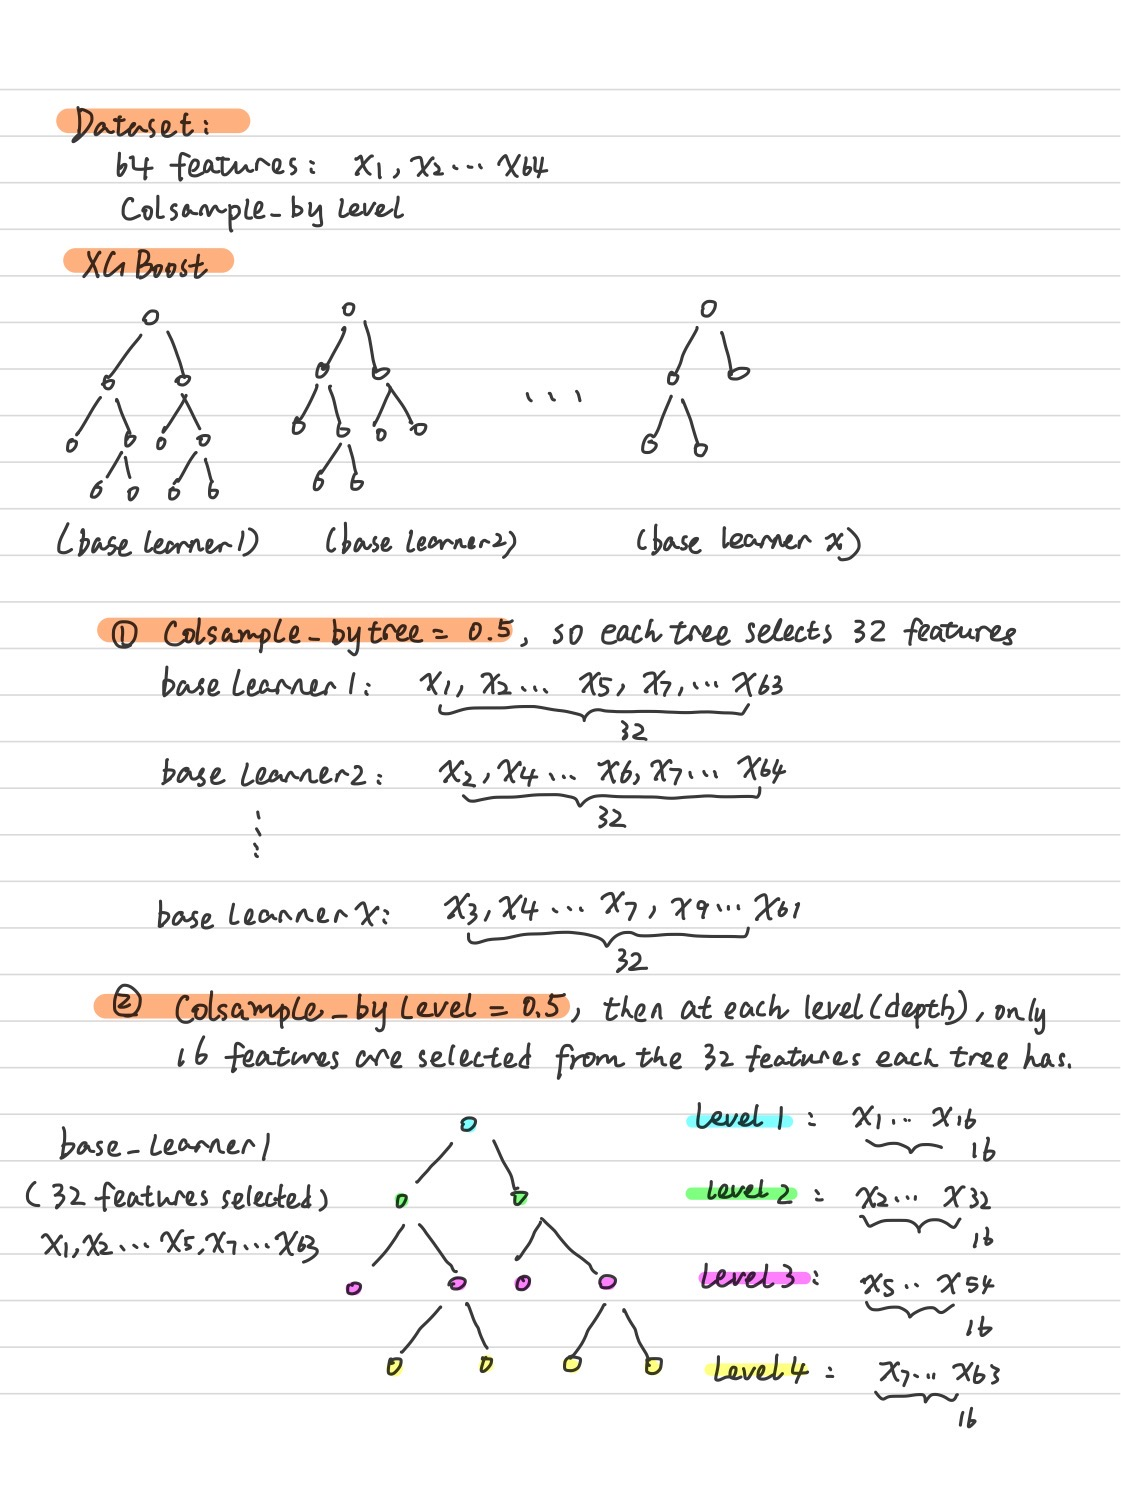

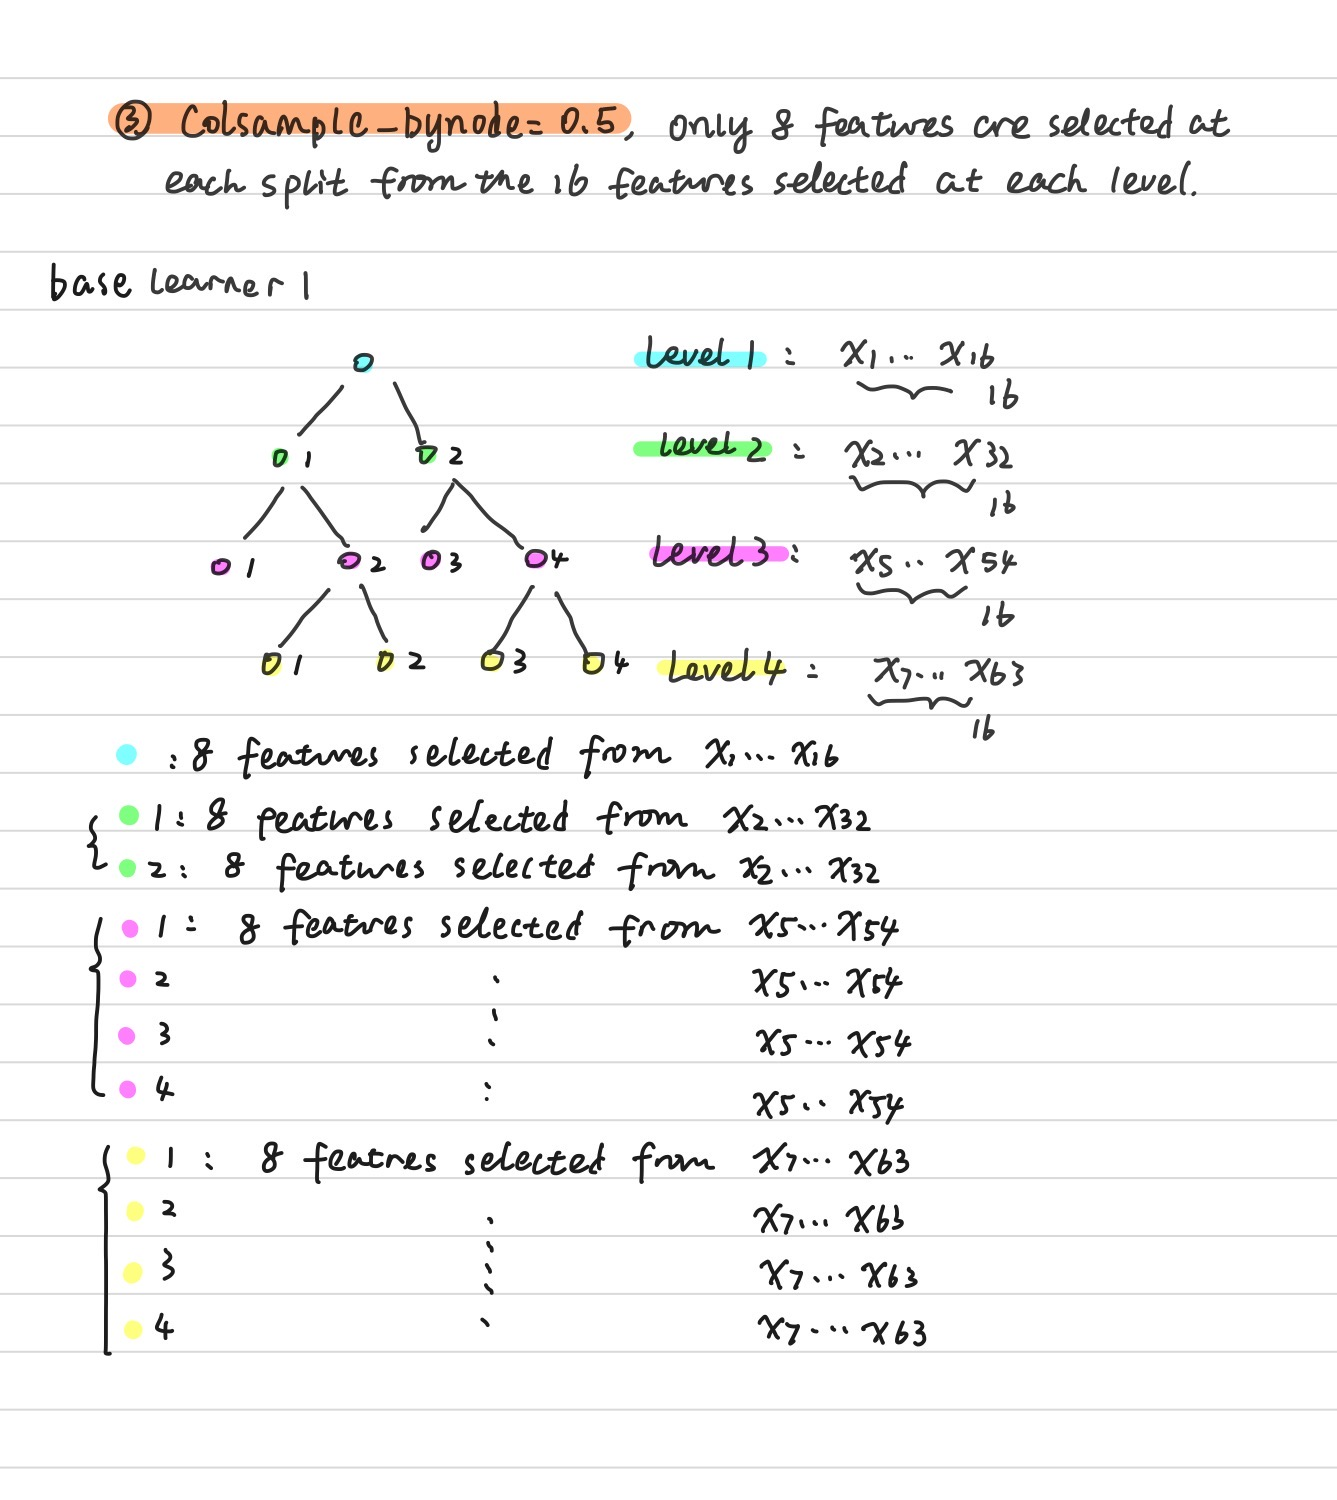

## LightGBM

### Краткое описание:
LightGBM использует две передовые техники (GOSS и EFB), которые значительно снижают время и нагрузку при нахождении наилучшего разбиения в каждом базовом обучении.

### a. Различие между XGBoost и LightGBM
Наиболее важное различие заключается в том, что в традиционном методе GBM необходимо пройти через все возможные признаки и точки разбиения, чтобы найти лучшее разбиение. В отличие от этого, LightGBM использует технику GOSS (Gradient-based One-Side Sampling), чтобы уменьшить количество проверяемых точек разбиения, и технику EFB (Exclusive Feature Bundling), чтобы уменьшить количество проверяемых признаков, что существенно повышает эффективность обучения.

| **XGBoost** | **LightGBM** |
| --- | --- |
| Использует точный жадный алгоритм/приближённый алгоритм с использованием взвешенной квантильной схемы для поиска лучшего разбиения | Использует гистограмный алгоритм/технику выборки с градиентом с одной стороны/объединение эксклюзивных признаков |
| Стратегия роста дерева по уровням | Стратегия роста дерева по листьям |
| Поддерживает только параллельную обработку признаков | Поддерживает параллельную обработку признаков, данных и голосования |
| Не поддерживает прямую работу с категориальными признаками | Прямо поддерживает категориальные признаки |

### b. Что такое гистограммный алгоритм?
Гистограммный алгоритм в LightGBM схож с приближённым алгоритмом, использующим взвешенную квантильную схему, описанным в разделе XGBoost. В этом алгоритме данные дискретизируются в наборы бинов, что позволяет значительно ускорить процесс поиска наилучших точек разбиения.

Ниже приведён псевдокод данного алгоритма, представленный в оригинальной статье:

**Алгоритм 1: Гистограммный алгоритм**

**Вход:**  
I: обучающие данные  
d: максимальная глубина  
m: количество признаков

```
nodeSet ← {0}   ▷ узлы дерева на текущем уровне  
rowSet ← {{0, 1, 2, ...}}  ▷ индексы данных в узлах дерева

для i = 1 до d:  
  для каждого node в nodeSet:  
    usedRows ← rowSet[node]  
    для k = 1 до m:  ▷ проходим по всем признакам  
      H ← новый Histogram()  ▷ строим гистограмму  
      для каждого j в usedRows:  
        bin ← I.f[k][j].bin  
        H[bin].y ← H[bin].y + I.y[j]  
        H[bin].n ← H[bin].n + 1  
    найти лучшее разбиение по гистограмме H  
    собирать статистику для гистограммы  
    обновить rowSet и nodeSet в соответствии с лучшими точками разбиения
```

В гистограммном алгоритме LightGBM каждый признак в наборе данных дискретизируется в наборы бинов. Например, если признак A принимает значения в диапазоне [0, 1), его можно разделить на k бинов, таких как [0, 0.1), [0.1, 0.2) и так далее. В зависимости от значения признака, каждый пример будет отнесён к одному из этих бинов, что ускоряет вычисления при поиске наилучших точек разбиения.

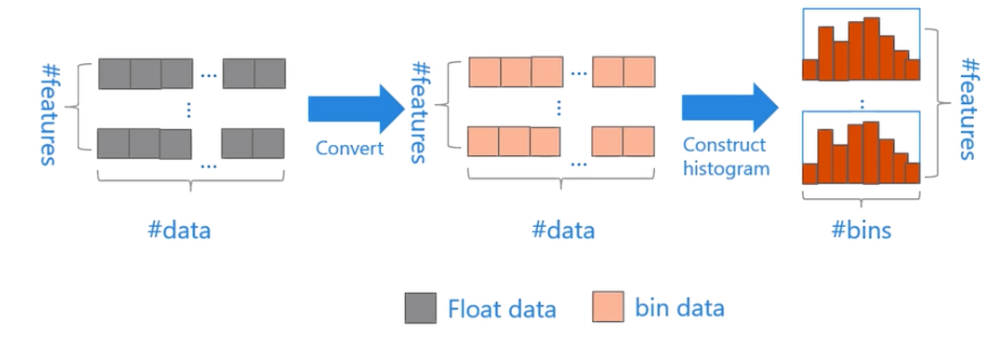

### Создание Бинов (Корзин)

LightGBM может работать как с категориальными, так и с непрерывными признаками.

#### Для непрерывного признака C
Входные данные: $n$ образцов в данном родительском узле.

На основе $n$ образцов мы можем вычислить количество различных значений $U$ в них, а затем сгруппировать образцы по этим уникальным значениям. Также необходимо заранее задать количество корзин $B$ и максимальное количество образцов, которое может быть размещено в одной корзине $M$.

- Если $U \leq B$, то каждая корзина будет содержать образцы только одного уникального значения.
- Если $U > B$, то в корзинах будут размещены группы с несколькими уникальными значениями. В этом случае мы подсчитываем количество образцов в каждой группе уникальных значений.

Для тех групп уникальных значений, где количество образцов больше, чем $n/B$, каждая такая группа будет формировать отдельную корзину.

Для оставшихся групп уникальных значений мы предварительно сортируем их на основе значения признака $C$ и упорядочиваем от наименьшего к наибольшему. Когда накопленное количество образцов достигает $M$, мы завершаем формирование одной корзины. Этот процесс продолжается, пока все образцы не будут распределены по корзинам.

#### Для категориального признака C
Входные данные: $n$ образцов в данном родительском узле.

На основе $n$ образцов мы можем вычислить количество различных категорий $U$ в них, после чего удаляем категории, которые составляют менее 1% от общего числа образцов. Каждая из оставшихся категорий будет помещена в свою корзину (по одной категории на корзину).

### Поиск наилучших точек разделения

#### Для непрерывного признака C
После построения корзин мы проходим по всем образцам, чтобы накопить статистику (оценку, основанную на градиенте и гессиане) для гистограммы (содержащей $K$ корзин) для каждого признака. После накопления статистики нам нужно лишь найти наилучшую точку раздела, дающую максимальное улучшение (gain), когда мы разделяем $k$ корзин на две части.

#### Для категориального признака C
Перед разделением необходимо заранее задать максимальное количество признаков, которые будут использоваться в методе "один против других" (max_cat_to_onehot), и максимальное количество корзин, которые будут искаться (max_cat_threshold).

- Если $U \leq \text{max\_cat\_to\_onehot}$, то мы используем метод "один против других". Например, если в признаке $C$ есть три различных категории $a1$, $a2$ и $a3$, то мы исследуем три возможных разделения: $[a1, a2\&a3]$, $[a2, a1\&a3]$, $[a3, a1\&a2]$ и находим разделение, дающее максимальное улучшение.
- Если $U > \text{max\_cat\_to\_onehot}$, то мы накапливаем статистику для каждой категории. Затем мы сортируем категории на основе значения $\frac{\sum(\text{градиенты})}{\sum(\text{гессианы})}$. После этого, начиная с максимальных значений, мы пытаемся различные точки раздела $max\_cat\_threshold$ раз, чтобы найти точку, дающую наибольшее улучшение.

### Преимущества использования алгоритма на основе гистограмм

Официальный сайт LightGBM выделяет 4 основные преимущества:

1. **Снижение затрат на вычисление прироста для каждого раздела**:
   - Алгоритмы, основанные на предварительной сортировке, имеют временную сложность $O(\#data)$.
   - Вычисление гистограммы имеет временную сложность $O(\#data)$, но это включает только быструю операцию суммирования. После того как гистограмма построена, алгоритм на основе гистограммы имеет временную сложность $O(\#bins)$, при этом $\#bins$ значительно меньше $\#data$.
   
2. **Использование вычитания гистограммы для ускорения**:
   - Для вычисления гистограммы для одного листа в бинарном дереве используется вычитание гистограммы его родительского узла и соседнего узла.
   - Это позволяет строить гистограмму только для одного листа (с меньшим числом данных, чем у его соседей). Затем гистограмма соседнего узла получается с помощью вычитания гистограммы с небольшой затратой ($O(\#bins)$).

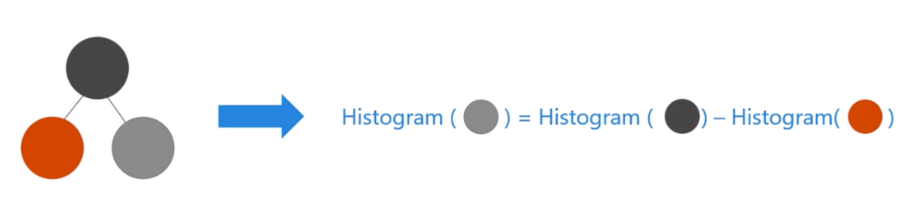

**Снижение использования памяти**

Заменяет непрерывные значения на дискретные интервалы. Если количество интервалов (бинов) небольшое, можно использовать компактные типы данных, например, uint8_t, для хранения обучающих данных.
Нет необходимости хранить дополнительную информацию для предварительной сортировки значений признаков.

**Снижение затрат на коммуникацию при параллельном обучении**

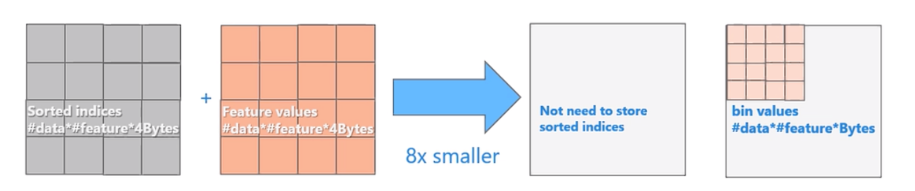

**c. Что такое GOSS (Gradient-based One-Side Sampling)?**

Помимо алгоритма Histogram, LightGBM также предлагает метод GOSS для дальнейшего сокращения использования оперативной памяти и экономии вычислительного времени при нахождении лучших признаков и точек разбиения.

Основная идея GOSS схожа с методом Adaboost. В Adaboost на каждом шаге итерации мы корректируем веса для каждого образца. Мы уменьшаем вес для правильно классифицированных примеров и увеличиваем его для неправильно классифицированных.

Однако в GBDT и XGBoost нет встроенных весов для образцов, поэтому нам приходится анализировать каждый образец, чтобы найти лучшие точки разбиения. В LightGBM используется градиент каждого экземпляра данных как прокси для веса образца. То есть, если у образца малый градиент, то, вероятно, ошибка обучения для этого экземпляра мала, и он уже хорошо обучен. И наоборот, если градиент большой, это может указывать на то, что образец еще недостаточно обучен.

После вычислений мы можем рассмотреть возможность исключения образцов с малыми градиентами, чтобы сэкономить время на поиск лучших точек разбиения. Однако, если мы исключим образцы с градиентами ниже определенного порога, это, скорее всего, приведет к изменению распределения образцов, что может снизить объяснительную способность модели.

В GOSS сохраняются образцы с высокими градиентами, но одновременно случайным образом выбираются экземпляры с низкими градиентами. Чтобы компенсировать эффект выбора лишь части образцов с малыми градиентами, GOSS вводит постоянный множитель для этих экземпляров данных при вычислении прироста информации.

Конкретно, GOSS сначала сортирует данные по абсолютному значению градиентов образцов и затем выбирает верхние *100% экземпляров. Также случайным образом выбираются *100% экземпляров с низкими градиентами. После этого GOSS увеличивает вес выбранных экземпляров с малыми градиентами на множитель (1-a) * b. Таким образом, GOSS смещает фокус модели на более недостаточно обученные экземпляры.

**Что такое прирост дисперсии?**

В GOSS модель LightGBM использует прирост дисперсии $V(d)$ для признака $j$ при точке разбиения $d$ по следующей формуле:

$$
V_2(d) = \frac{1}{n(d)} \left( \sum_{\text{A}} g_i + \sum_{\text{B}} g_i \right)^2 - \frac{1}{n(d)} \left( \sum_{\text{A}} g_i^2 + \sum_{\text{B}} g_i^2 \right)
$$

Здесь $A$ — это множество экземпляров с высокими градиентами, а $B$ — множество с низкими градиентами. В этой формуле используется градиент каждого образца. Обозначения $A_l, A_r, B_l, B_r, n_l, n_r$ определяются следующим образом:

- $A_l$: экземпляры, для которых $x_j \leq d$,
- $A_r$: экземпляры, для которых $x_j > d$,
- $B_l$: экземпляры, для которых $x_j \leq d$ с низким градиентом,
- $B_r$: экземпляры, для которых $x_j > d$ с низким градиентом.

Для поиска лучшей точки разбиения $d$ для признака $j\ необходимо найти такое $d$, которое максимизирует $V(d)$.

В традиционном GBDT прирост дисперсии выражается по формуле:

$$
V(d) = \frac{1}{n_l} \sum_{i \in A_l} g_i^2 + \frac{1}{n_r} \sum_{i \in A_r} g_i^2
$$

Здесь $O$ — текущая вершина, $g_i$ — градиент каждого образца. $O_l, O_r, n_l, n_r$ определяются следующим образом:

- $O_l$: экземпляры, для которых $x_j \leq d$,
- $O_r$: экземпляры, для которых $x_j > d$,
- $n_l$: количество экземпляров в $O_l$,
- $n_r$: количество экземпляров в $O_r$.

**Математика, стоящая за приростом дисперсии**

Термин "прирост дисперсии" может показаться незнакомым, но это на самом деле то же самое, что и в случае MSE в методе регрессии в градиентном бустинге. В GBDT мы подбираем регрессионное дерево для предсказания градиента, как это показано в следующей формуле:

$$
\min_{b(x)} \sum_{i=1}^N \left[ y_i - b(x_i) \right]^2
$$

Предположим, что мы находимся в середине подбора нового дерева $b(x)$, имея $J$ признаков, то наш убыток до следующего разбиения по признаку $j$ выглядит как:

$$
\text{Loss before} = \sum_{i=1}^N \left( g_i - b(x_i) \right)^2
$$

После следующего разбиения на признаке $j$ убыток становится:

$$
\text{Loss after} = \sum_{i \in O_l} \left( g_i - b(x_i) \right)^2 + \sum_{i \in O_r} \left( g_i - b(x_i) \right)^2
$$

Таким образом, наш прирост от этого разбиения равен:

$$
\text{Gain} = \text{Loss before} - \text{Loss after}
$$

Для минимизации потерь при поиске лучшего разбиения мы ищем разбиение, которое минимизирует данный прирост.



**Что такое EFB (Exclusive Feature Bundling)?**

LightGBM предлагает метод, позволяющий сократить количество признаков при поиске оптимальных признаков для экономии вычислительных ресурсов.

На практике данные с высокой размерностью часто являются разреженными. Это означает, что многие признаки являются взаимоисключающими, то есть они никогда не принимают ненулевые значения одновременно. В таких случаях можно уменьшить размерность признаков, объединив взаимоисключающие признаки в один "крупный" признак.

Простой пример:

| Признак A | Признак B | Взаимоисключающий? |
|-----------|-----------|-------------------|
| 1.0       | 2.0       | Нет               |
| 3.0       | 7.0       | Нет               |
| 0.0       | 11.0      | Нет               |
| 0.0       | 0.0       | Да                |

Напоминаем, что one-hot кодирование обычно генерирует большое количество разреженных признаков, поэтому техника EFB может быть весьма полезной на практике.

**Какие признаки следует объединять?**

В статье LightGBM доказано, что разбиение признаков на минимальное количество взаимоисключающих групп является задачей, NP-полной, что означает, что поиск наилучшего объединения требует огромного времени.

Поэтому в LightGBM рассматривают эту задачу как задачу раскраски графа (Graph Color Problem, GCP) и применяют жадный алгоритм для её решения. Граф строится следующим образом: признаки считаются вершинами графа, и между признаками, которые не являются взаимоисключающими, добавляются рёбра с весами, соответствующими общей степени конфликтов между этими признаками. Таким образом, задача сводится к задаче раскраски графа с ограничением K на максимальное количество конфликтов в каждой группе.

Ниже представлен псевдокод алгоритма из оригинальной статьи:

**Алгоритм 3: Жадное объединение**

Вход: F — признаки, K — максимальное количество конфликтов  
1. Построить граф G  
2. Определить порядок сортировки: `searchOrder ← G.sortByDegree()`  
3. Инициализировать пустые множества: `bundles ← {}`, `bundlesConflict ← {}`  
4. Для каждого признака в порядке сортировки:  
   - Установить `needNew ← True`  
   - Для каждого набора в `bundles`:  
     - Рассчитать количество конфликтов между текущим набором и признаком  
     - Если сумма конфликтов с учетом уже имеющихся конфликтов в `bundles` меньше K, то добавить признак в текущий набор и установить `needNew ← False`  
   - Если требуется новый набор, создать новый и добавить признак в него.  
5. Выход: `bundles` — окончательные объединенные группы признаков.

Алгоритм использует жадный подход для минимизации конфликтов, при этом сохраняя ограничения на количество конфликтов в одной группе признаков.

**Как построить объединение признаков?**

Ключевым моментом при построении объединений признаков является обеспечение того, чтобы значения исходных признаков можно было идентифицировать в объединённых признаках. Поскольку LightGBM использует алгоритм, основанный на гистограммах, достаточно разместить взаимоисключающие признаки в различных бинах, что можно сделать, добавив смещения к исходным значениям признаков.

Например, если у нас есть два признака A и B в одном объединении признаков, то для диапазонов [0, 30) для A и [20, 50) для B достаточно добавить 10 к признаку B на каждом экземпляре, чтобы объединить их в один новый признак C с диапазоном [0, 60).

Ниже приведён псевдокод для объединения признаков:

**Алгоритм 4: Объединение взаимоисключающих признаков**

Вход: `numData` — количество данных, `F` — один набор взаимоисключающих признаков  
1. Инициализировать переменные: `binRanges ← {0}`, `totalBin ← 0`  
2. Для каждого признака в F пройти по всем признакам, чтобы найти диапазоны бинов и обновить `totalBin`.  
3. Создать новый бин с количеством данных: `newBin ← new Bin(numData)`  
4. Для каждого экземпляра данных:  
   - Для каждого признака в F добавить смещения  
   - Если бин признака не равен нулю, обновить значения в новом бине с учётом смещений.  
5. Выход: новый бин и диапазоны бинов.

**Что такое стратегия роста деревьев Leaf-wise?**




Большинство моделей GBDT, включая XGBoost, используют стратегию роста дерева по уровням (Level-wise). Эта стратегия предполагает, что на каждом уровне дерева происходит разделение всех узлов на два дочерних узла.


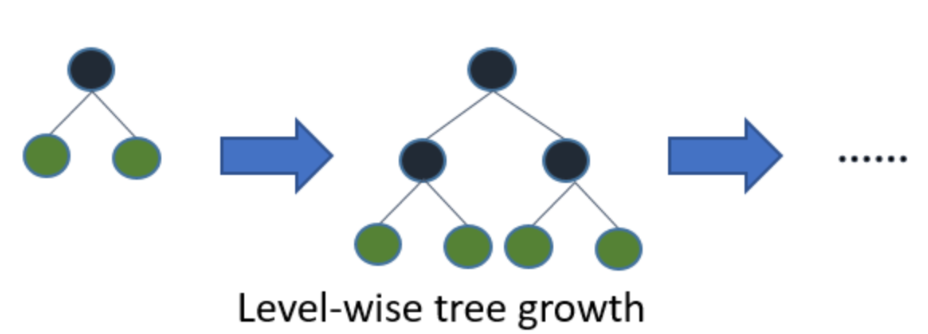


В отличие от этого, LightGBM использует стратегию роста дерева Leaf-wise, которая заключается в выборе узла с максимальной дельтой потерь для дальнейшего разветвления. На официальном сайте LightGBM указано, что алгоритмы на основе роста по листьям, как правило, дают меньшие потери, если количество листьев фиксировано. Однако, если размер данных небольшой, алгоритмы на основе роста по уровням склонны к переобучению, что делает стратегию Leaf-wise более подходящей.


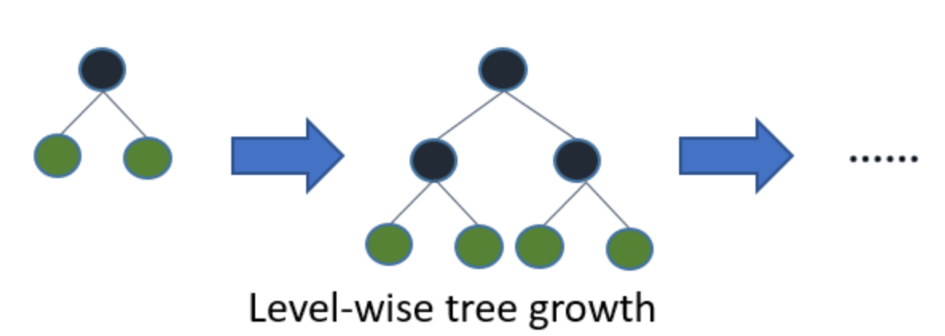


На практике, алгоритмы, такие как Histogram Algorithm, GOSS и EFB в LightGBM, не только ускоряют обучение и уменьшают использование оперативной памяти, но и служат естественными средствами борьбы с переобучением, поскольку делают модель менее чувствительной к мелким изменениям в данных. Поэтому стратегия роста деревьев Leaf-wise работает идеально в LightGBM.


